In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import regex as re

In [2]:
df=pd.read_csv('Admission_Predict.csv') 

In [3]:
df.head()




,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df['Chance of admit class']=df['Chance of Admit '].apply(lambda x:1 if x>0.80 else 0)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

In [10]:

X=df[columns]
y=df.iloc[:,9]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
df.shape


(400, 10)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
df.isnull().sum()

Serial No.               0
GRE Score                0
TOEFL Score              0
University Rating        0
SOP                      0
LOR                      0
CGPA                     0
Research                 0
Chance of Admit          0
Chance of admit class    0
dtype: int64

In [15]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,0.29250
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,0.45548
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,0.00000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,0.00000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,0.00000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,1.00000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.00000


In [16]:
y_pred=classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)*100
score

95.83333333333334

In [18]:
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=3)

In [19]:
Knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
pred=Knn.predict(X_test)

In [21]:
print(Knn.score(X_test, y_test))

0.5360637912287061


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model .predict(X_test)


p=svc_model.score(X_test, y_test)*100
p

90.0

In [24]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
sc=metrics.accuracy_score(y_test, y_pred)*100
sc

c:\users\yashs\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.33333333333333

In [25]:
int
courses=['Randomforest','svm','logistic'];
values=[score,p,sc]

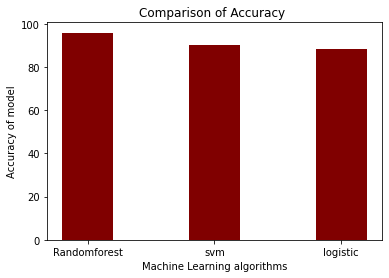

In [26]:
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning algorithms")
plt.ylabel("Accuracy of model")
plt.title("Comparison of Accuracy ")
plt.show()